In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def find_closest_centroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)
    for i in range(X.shape[0]):
          distance = []
          for j in range(centroids.shape[0]):
              norm_ij = np.linalg.norm(X[i] - centroids[j])
              distance.append(norm_ij)
          idx[i] = np.argmin(distance)
    return idx

def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
          points = X[idx == k]
          centroids[k] = np.mean(points, axis = 0)
    return centroids

def kMeans_init_centroids(X, K):
    # Randomly reorder the indices of image
    randidx = np.random.permutation(X.shape[0])

    # Take the first K values as centroids
    centroids = X[randidx[:K]]
    return centroids

def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)

    # Run K-Means
    for i in range(max_iters):

        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))

        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)

        # Now, compute new centroids
        centroids = compute_centroids(X, idx, K)
    return centroids, idx

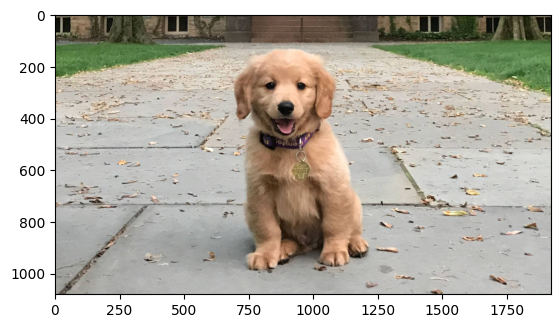

In [4]:
img_path = os.path.join('C:\\', 'Users', '91942', 'OneDrive', 'Desktop', 'Project', 'dog.jpg')
original_img = plt.imread(img_path)
plt.imshow(original_img)
plt.show()

In [5]:
original_img.shape

(1080, 1920, 3)

In [7]:
#Reshape in form of n*3
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))
X_img.shape

(2073600, 3)

In [8]:
K = 16
max_iters = 10
initial_centroids = kMeans_init_centroids(X_img, K)

In [9]:
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [11]:
X_recovered = centroids[idx, :]
X_recovered = np.reshape(X_recovered, original_img.shape)

In [44]:
x2 = X_recovered/255

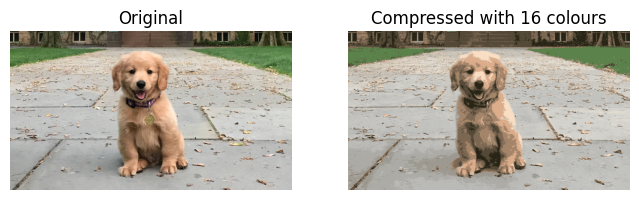

In [47]:
#Plot compressed and original image quality
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(x2)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()